# Box packing using Simulated Annealing algorithm

This notebook demonstrates a way to use Simulated Annealing (SA) algorithm to pack 2D rectangular objects to a 2D rectangular box. 

Few notes about the code:
- The algorithm code is in SimulatedAnnealing class. It is very generic and contains minimal amount of problem specific logic. It uses the Rectangle, Box, RectangleMover and CostAnalyzer for the problem specific parts. 
- Rectangle objects are the ones that will be packed in the box. 
- Box defines the container where the Rectangles are packed.
- RectangleMover does all the practical work, i.e. move the rectangles and rotate those as an attemp to find better packing solution. 
- CostAnalyzer analyzes the overall cost of the packing solution. Ideal packing has zero cost. Cost increases when the amount of problems in the packing increase. Problems are e.g. overlaps of the rectangle objects and rectangles located outside of the box. 

For practical application tips see e.g. https://courses.cs.washington.edu/courses/cse473/05au/notes/SimulatedAnnealing.pdf



### Imports

In [1]:
%load_ext autoreload
%autoreload 2

from simulated_annealing import SimulatedAnnealing
from rectangle import Rectangle
from box import Box
from rectangle_mover import RectangleMover
from cost_analysis import CostAnalyzer
from visualization import plot_history, plot_rect_paths, plot_rects

import numpy as np

### Setup the initial situation 
This defines the box and the rectangles that are to be packed inside the box. 

In [2]:
# Initialize seed value for reproducing the demo case 
np.random.seed(313)

# Create box object
box = Box(size_x=4, size_y=6)
box_area = box.size_x * box.size_y

# Create rectangle objects that fill a given ratio of the box
max_fill_ratio = 0.8

rect_areas = 0
rect_count = 0 
while (rect_areas / box_area) < max_fill_ratio: 
    
    size_x = 0.2 + np.random.rand() * 2
    size_y = 0.2 + np.random.rand() * 2
    max_rect_area = box_area * max_fill_ratio - rect_areas
    if (size_x * size_y) > max_rect_area:
        size_y = max_rect_area / size_x
        if size_y < 0.1: 
            break
        
    rect_count += 1

    # Get random color for each rectangle
    color = np.random.rand(4)
    color[3] = 0.4 # make color transparent
    
    rect = Rectangle(
        name='Rect{}'.format(rect_count),
        size_x=size_x, 
        size_y=size_y,
        color=color
    )
    # Add rectangle to the box
    box.add_rectangle(rect)
    
    rect_areas += size_x * size_y 
    
print('Created {} rectangle objects'.format(rect_count))
print('Rectangles are {:0.3f} % of box area'.format((rect_areas / box_area) * 100))

Created 15 rectangle objects
Rectangles are 80.000 % of box area


### Set random initial positions and plot the starting point

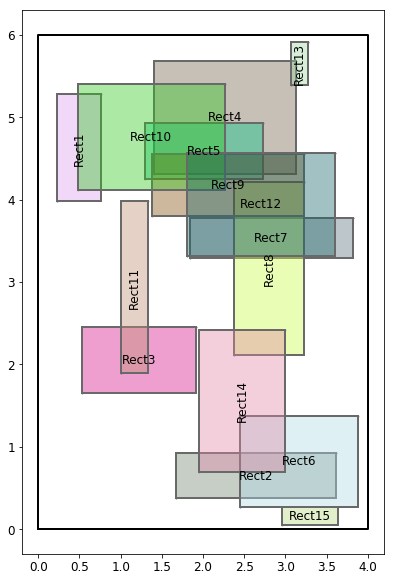

In [3]:
rect_mover = RectangleMover()
rect_mover.random_initialization(box)
plot_rects(box)

### Run optimization
This sets up the Simulated Annealing optimizer with the key parameters and objects.

The optimization states and the final results are stored in the parameters of the Rectangle objects that are stored in the Box object. 

In [4]:
sa = SimulatedAnnealing( 
    iterations=rect_count * 1000, 
    early_stop=True,
    start_temperature=1.0, 
    end_temperature=0.0, 
    rect_mover=rect_mover,
    cost_analyzer=CostAnalyzer()
)

sa.optimize(box)

Early stop at iteration 11987.
Optimization achieved zero cost result.


### Plot the final packing of the rectangles inside the box

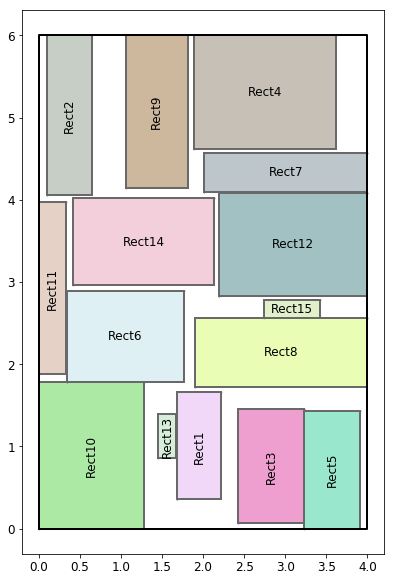

In [5]:
plot_rects(box)

### Plot the algorithm key parameter history from the optimization process

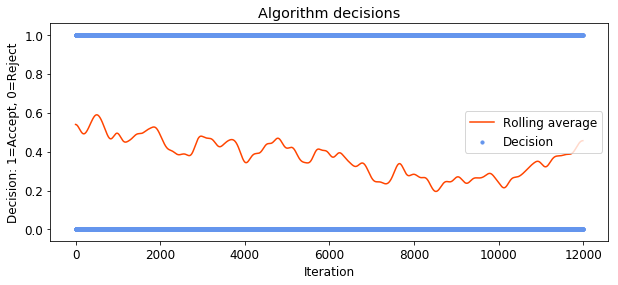

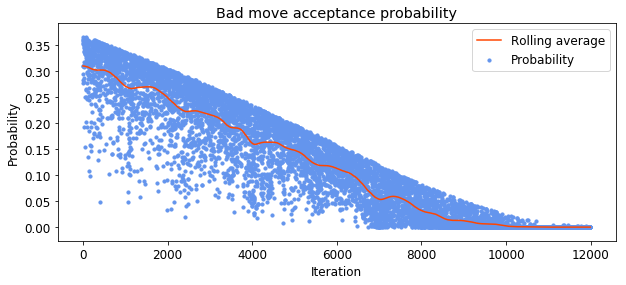

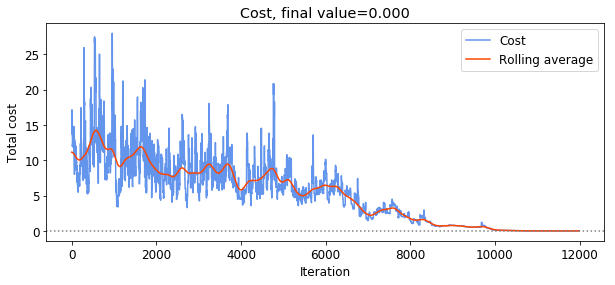

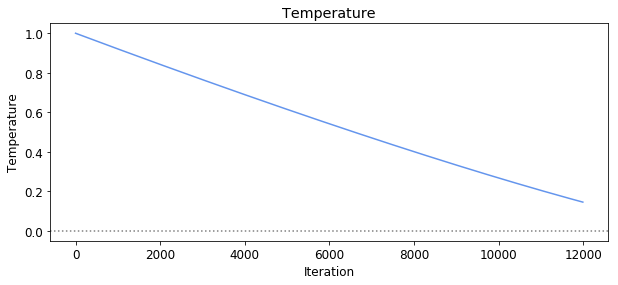

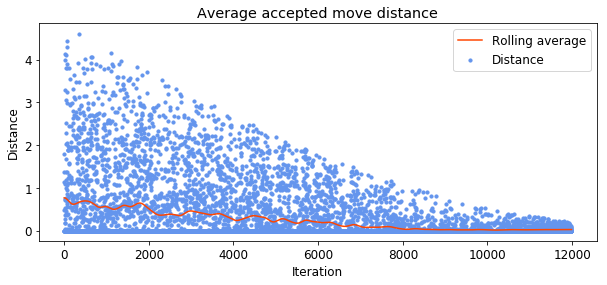

In [6]:
plot_history(sa, box)

### Visualize the rectangle paths during the optimization process
This shows each box bottom left corner path. 

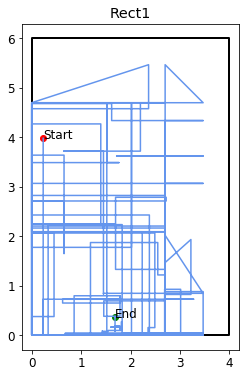

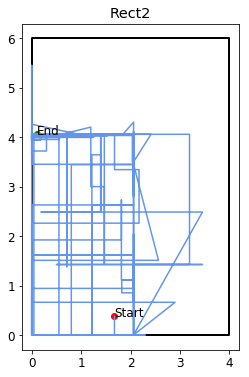

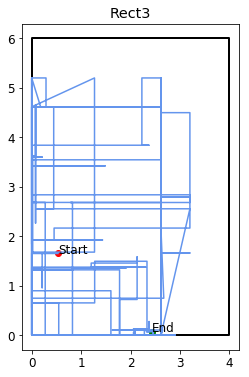

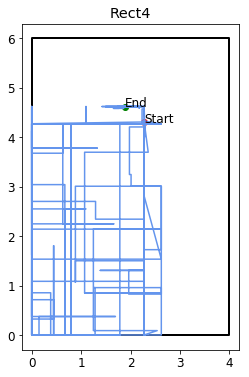

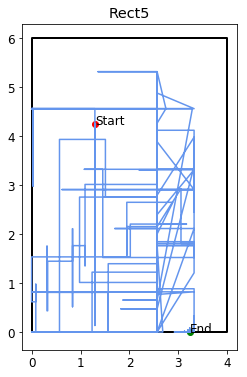

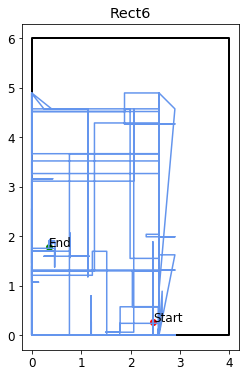

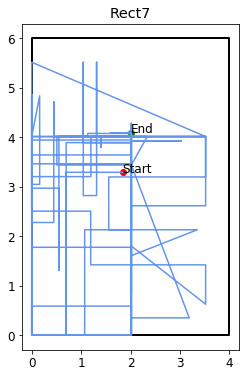

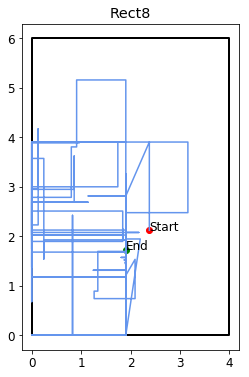

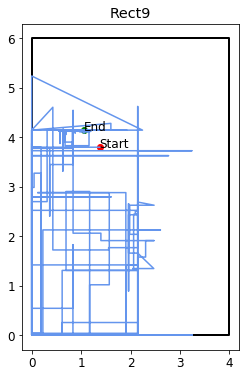

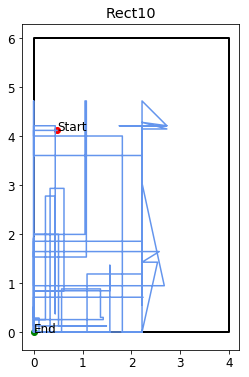

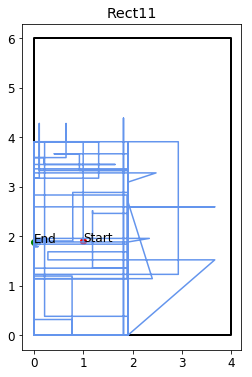

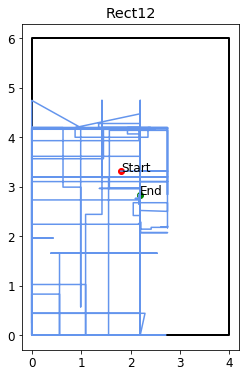

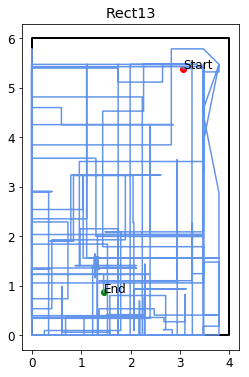

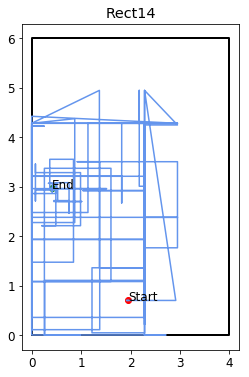

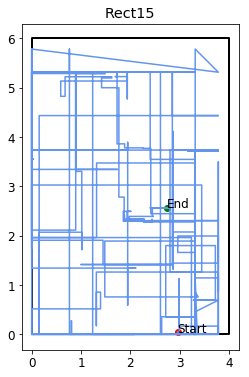

In [7]:
plot_rect_paths(box)